In [2]:
#import pandas library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading dataset
df=pd.read_csv("diabetes.csv")

In [4]:
df["gender"]=(df["gender"]=="male").astype(int)
df["diabetes"]=(df["diabetes"]=="Diabetes").astype(int)
df.drop(["patient_number"], axis=1, inplace=True)
df["bmi"] = df["bmi"].str.replace(",",".").astype(float)
df["waist_hip_ratio"] = df["waist_hip_ratio"].str.replace(",",".").astype(float) 
df["chol_hdl_ratio"] = df["chol_hdl_ratio"].str.replace(",",".").astype(float)

In [5]:
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,0
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,0
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,0


In [6]:
# dataset
df.shape

(390, 15)

In [7]:
# dataset.head()
df.isnull().sum()

cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      390 non-null    int64  
 1   glucose          390 non-null    int64  
 2   hdl_chol         390 non-null    int64  
 3   chol_hdl_ratio   390 non-null    float64
 4   age              390 non-null    int64  
 5   gender           390 non-null    int32  
 6   height           390 non-null    int64  
 7   weight           390 non-null    int64  
 8   bmi              390 non-null    float64
 9   systolic_bp      390 non-null    int64  
 10  diastolic_bp     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
 14  diabetes         390 non-null    int32  
dtypes: float64(3), int32(2), int64(10)
memory usage: 42.8 KB


In [9]:

df.describe()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,4.524615,46.774359,0.415385,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,0.153846
std,44.666005,53.798188,17.279069,1.736634,16.435911,0.493421,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,0.361265
min,78.000000,48.000000,12.000000,1.500000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,0.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,0.000000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,0.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,0.000000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,0.000000
max,443.000000,385.000000,120.000000,19.300000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,1.000000


In [10]:
df['diabetes'].value_counts()

0    330
1     60
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

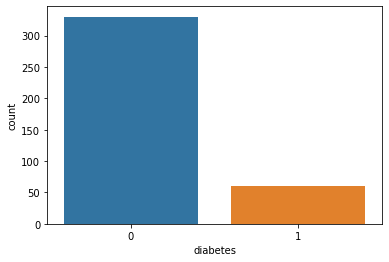

In [11]:
sns.countplot(df['diabetes'])

In [12]:
y=df.diabetes
y

0      0
1      0
2      0
3      0
4      0
      ..
385    0
386    1
387    0
388    1
389    0
Name: diabetes, Length: 390, dtype: int32

In [13]:
x=df.drop(['diabetes'], axis=1)
x

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,5.2,83,0,59,125,25.2,150,90,35,40,0.88
386,226,279,52,4.3,84,0,60,192,37.5,144,88,41,48,0.85
387,301,90,118,2.6,89,0,61,115,21.7,218,90,31,41,0.76
388,232,184,114,2.0,91,0,61,127,24.0,170,82,35,38,0.92


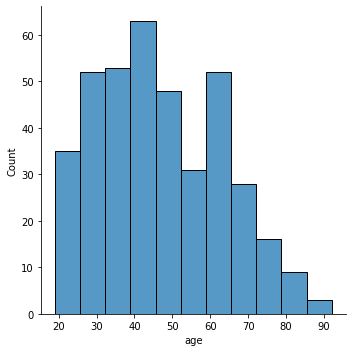

In [14]:
ax=sns.displot(data=df,x="age")

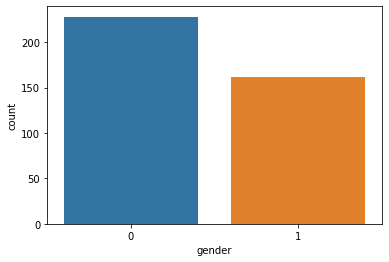

In [15]:
# from sklearn.preprocessing import LabelEncoder
ax=sns.countplot(data=df,x="gender",)

In [16]:
# labelencoder_X=LabelEncoder()
# ax=sns.countplot(data=df,x="diabetes",)

In [17]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [18]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model= model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [19]:
tr_pred= model.predict(x_train)

In [20]:
##Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 87.17948717948718


In [21]:
##Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_train, tr_pred)*100)

Accuracy: 100.0


In [22]:
# from sklearn.tree import DecisionTreeClassifier
y_test.shape

(78,)

In [23]:
y_train.shape

(312,)

In [24]:
# accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8717948717948718

In [25]:
y=df.diabetes
y

0      0
1      0
2      0
3      0
4      0
      ..
385    0
386    1
387    0
388    1
389    0
Name: diabetes, Length: 390, dtype: int32

In [26]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[58,  5],
       [ 5, 10]], dtype=int64)

In [27]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        63
           1       0.67      0.67      0.67        15

    accuracy                           0.87        78
   macro avg       0.79      0.79      0.79        78
weighted avg       0.87      0.87      0.87        78



In [28]:
#checking prediction value
model.predict([[1,90,49,3.9,15,0,81,120,22.5,118,90,35,40,0.9]])

array([0])

In [29]:
model.predict([[194,269,38,5.1, 29,1,69,167,24.7,120,70,3,40,0.83]])

array([1])

In [30]:
!pip install six

In [31]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 91.02564102564102


In [32]:
# df_importance=pd.DataFrame({'Features':x.columns,'Importances': model.feature_importances_})
# df_importance

In [33]:
df.corr()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
cholesterol,1.000000,0.158102,0.193162,0.475927,0.247333,-0.030139,-0.063601,0.062359,0.091695,0.207741,0.166241,0.134038,0.093364,0.091847,0.204262
glucose,0.158102,1.000000,-0.158302,0.282210,0.294392,0.093372,0.098052,0.190358,0.129286,0.162777,0.020262,0.222336,0.138223,0.185117,0.689080
hdl_chol,0.193162,-0.158302,1.000000,-0.681867,0.028210,-0.108305,-0.087238,-0.291883,-0.241860,0.031807,0.078342,-0.276697,-0.223837,-0.158777,-0.123133
chol_hdl_ratio,0.475927,0.282210,-0.681867,1.000000,0.163201,0.102938,0.081162,0.278812,0.228407,0.115505,0.038242,0.313262,0.208902,0.243329,0.272987
age,0.247333,0.294392,0.028210,0.163201,1.000000,0.084177,-0.082229,-0.056784,-0.009164,0.453417,0.068649,0.150585,0.004675,0.275188,0.301995
gender,-0.030139,0.093372,-0.108305,0.102938,0.084177,1.000000,0.677876,0.092053,-0.254189,0.035417,0.071043,-0.045955,-0.272028,0.346253,0.015531
height,-0.063601,0.098052,-0.087238,0.081162,-0.082229,0.677876,1.000000,0.255389,-0.259589,-0.040704,0.043617,0.057447,-0.095906,0.252548,0.023466
weight,0.062359,0.190358,-0.291883,0.278812,-0.056784,0.092053,0.255389,1.000000,0.860147,0.097497,0.166477,0.847766,0.826985,0.250461,0.162987
bmi,0.091695,0.129286,-0.241860,0.228407,-0.009164,-0.254189,-0.259589,0.860147,1.000000,0.121408,0.145304,0.810701,0.881728,0.100873,0.145274
systolic_bp,0.207741,0.162777,0.031807,0.115505,0.453417,0.035417,-0.040704,0.097497,0.121408,1.000000,0.603662,0.210934,0.155321,0.137871,0.198600


<AxesSubplot:>

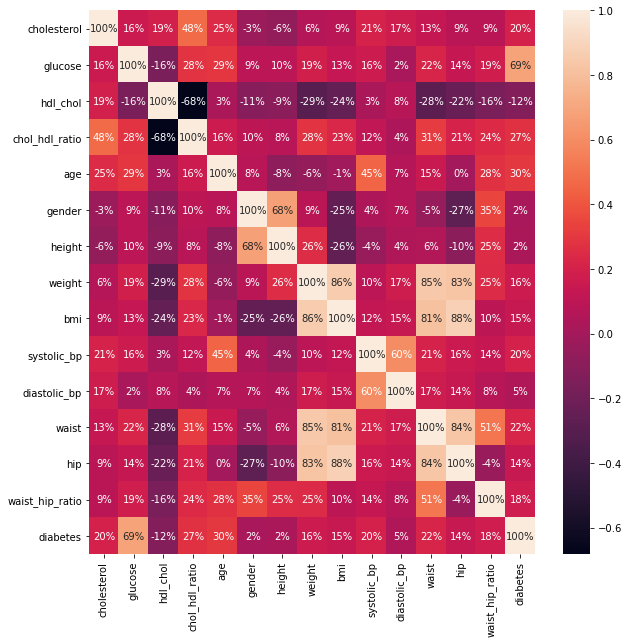

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".0%")

<AxesSubplot:xlabel='age', ylabel='count'>

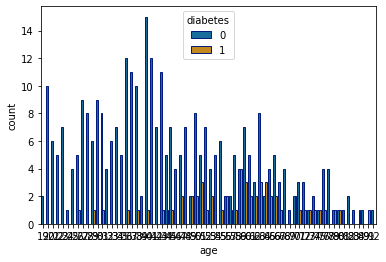

In [35]:
sns.countplot(x="age", hue="diabetes", data=df, palette="colorblind",
              edgecolor= sns.color_palette("dark", n_colors=1))

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

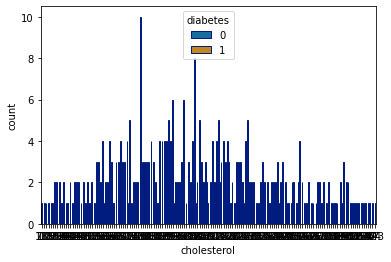

In [36]:
sns.countplot(x="cholesterol", hue="diabetes", data=df, palette="colorblind", 
              edgecolor= sns.color_palette("dark", n_colors=1))

<AxesSubplot:xlabel='weight', ylabel='Count'>

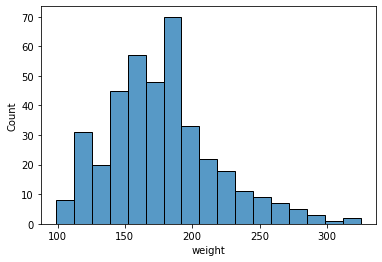

In [37]:
sns.histplot(data=df, x="weight")

In [38]:
import pickle
pickle.dump(model,open("Diabetes_classifier.pickle",'wb')) 